### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

答: 自变量是显示的文字与它们打印颜色匹配的一致性；因变量是说出同等大小的列表中的墨色名称的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

答：1、该任务是相依样本在不同条件的测试数据，因此采用配对t检验假设集如下：  
      $μ_c$表示显示文字与打印颜色一致时说出墨色名称的时间的总体均值；  
      $μ_i$表示显示文字与打印颜色不一致时说出墨色名称的时间的总体均值。    
      
   2、对以上假设集设立如下零假设和对立假设：  
   零假设：对于一致文字条件和不一致文字条件列表，说出对应墨色名称的时间相同。即：$μ_c$ = $μ_i$；  
   对立假设：对于一致文字条件和不一致文字条件列表，说出对应墨色名称的时间不相同。即：$μ_c$ ！= $μ_i$。   
   
   3、针对以上假设执行配对t检验中的双尾检验，α=0.05。选择原因如下:  
   a、同一受试者参加两次测试得到的数据，因此使用相依样本t检验；  
   b、只有样本数据，总体均值和标准偏差未知，且样本量小于30；进行一致文字条件或者不一致文字条件测试的时间应该是正态分布的。样本数据可以用来估计总体方差，因此使用配对t检验；  
   c、在对立假设中，即不一致文字条件下，说出墨色名称的时间与文字一致条件下的时间不同。因此选择双尾检验。
   
   

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# 在这里执行你的分析
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('stroopdata.csv')

In [2]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [3]:
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

答：通过以上数据可以得出：  
一、集中趋势测量  
均值：一致文字条件下：$\bar{x}_{c}$ = 14.0511 不一致文字条件下：$\bar{x}_{i}$ = 22.0159   
中位数：一致文字条件下：median_c = 14.3565 不一致文字条件下：median_i = 21.0175  
  
二、变异测量  
值域：一致文字条件下：range_c = 13.698 不一致文字条件下：range_i = 19.568  
样本标准偏差：一致文字条件下：std_c = 3.559358 不一致文字条件下：std_i = 4.797057


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

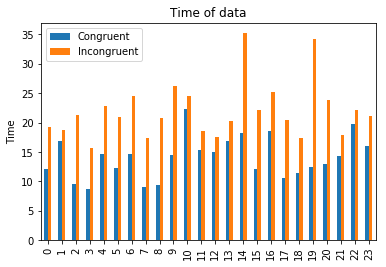

In [4]:
# 在这里创建可视化图表
df.plot(kind = 'bar')
plt.title('Time of data')
plt.ylabel('Time');

答：通过可视化图表观察可得，不一致的文字条件下，说出同等大小的列表中的墨色名称的时间均高于一致文字条件下的时间。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

增加一列D计算两组的差异值，并计算差异列的标准偏差

In [5]:
# 在这里执行统计检验
df['D'] = df['Incongruent'] - df['Congruent']
# 计算差异均值
df['D'].mean()

7.9647916666666658

In [6]:
df['D'].std()

4.8648269103590556

答：一、计算t临界值:置信水平95%，α=0.05, n=24, df=23,执行双尾检验，查表得${t}_{critical}$ = 2.069

二、由上述计算得出：  
两组数据的差异均值 $\bar{d}$ = 7.9648  
计算差异的样本标准偏差 S = 4.8648  
计算均值标准误差：  SEM = $\frac{S}{\sqrt{n}}$ = 0.9930  
计算t统计量：t =$\frac{\overline d - \mu}{SEM}$ =$\frac{\overline d - 0}{SEM}$ = 8.02

由于t > ${t}_{critical}$,处于临界区内，并且查表计算出P<0.05, 因此拒绝零假设。  
结论：该结果拒绝零假设，统计结果显著。对于一致文字条件和不一致文字条件列表，说出对应墨色名称的时间不相同。与期望一致。

参考内容：  

1、假设检验资料：http://support.minitab.com/zh-cn/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/why-use-paired-t/
  
2、LaTeX数学符号语法参考：https://blog.csdn.net/qq_39232265/article/details/78868487